In [2]:
from tensorflow import keras
from keras.datasets.fashion_mnist import load_data
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
m = keras.models.load_model('best-cnn-model.h5')

In [4]:
m.layers

In [7]:
conv = m.layers[0]
conv.weights[0].shape,conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [10]:
w = conv.weights[0].numpy()
w.mean(), w.std()

(-0.025312617, 0.25047907)

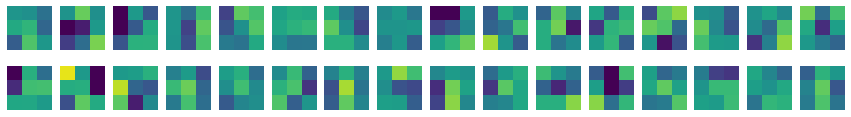

In [11]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(w[:,:,0,i*16+j], vmin=-0.5, vmax = 0.5)
        axs[i,j].axis('off')

In [12]:
n_m = keras.Sequential()
n_m.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',
                            padding='same',input_shape=(28,28,1)))

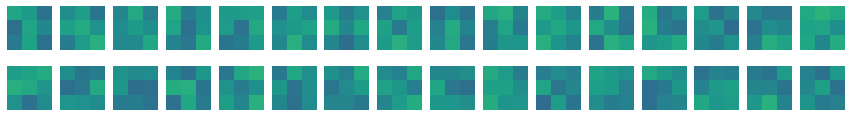

In [13]:
n_conv = n_m.layers[0]
n_w = n_conv.weights[0].numpy()
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(n_w[:,:,0,i*16+j], vmin=-0.5, vmax = 0.5)
        axs[i,j].axis('off')

(array([  1.,   0.,   1.,   4.,   0.,   8.,  51.,  92., 105.,  26.]),
 array([-1.6779169 , -1.4637436 , -1.2495704 , -1.035397  , -0.8212238 ,
        -0.60705054, -0.39287722, -0.17870396,  0.03546932,  0.2496426 ,
         0.46381587], dtype=float32),
 <BarContainer object of 10 artists>)

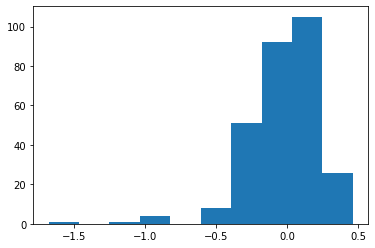

In [14]:
plt.hist(w.reshape(-1,1))

(array([31., 24., 32., 33., 29., 25., 36., 24., 25., 29.]),
 array([-0.14193562, -0.1136645 , -0.08539338, -0.05712227, -0.02885115,
        -0.00058004,  0.02769108,  0.0559622 ,  0.08423331,  0.11250443,
         0.14077555], dtype=float32),
 <BarContainer object of 10 artists>)

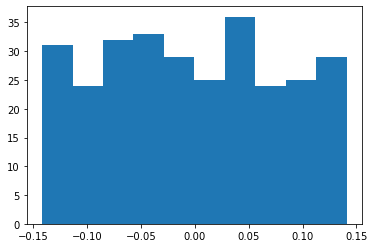

In [15]:
plt.hist(n_w.reshape(-1,1)) # 학습이 안된것.

In [16]:
m.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [18]:
cov_act1 = keras.Model(m.input, m.layers[0].output)
(x_data,y_data),(t_x_data,t_y_data) = keras.datasets.fashion_mnist.load_data()
in_data=x_data.reshape(-1,28,28,1)/255.0

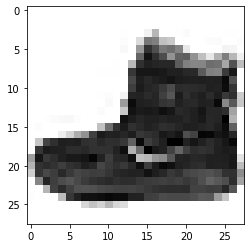

In [19]:
plt.imshow(x_data[0], cmap = 'gray_r')

In [21]:
f_map = cov_act1.predict(in_data[0:1])
f_map.shape

(1, 28, 28, 32)

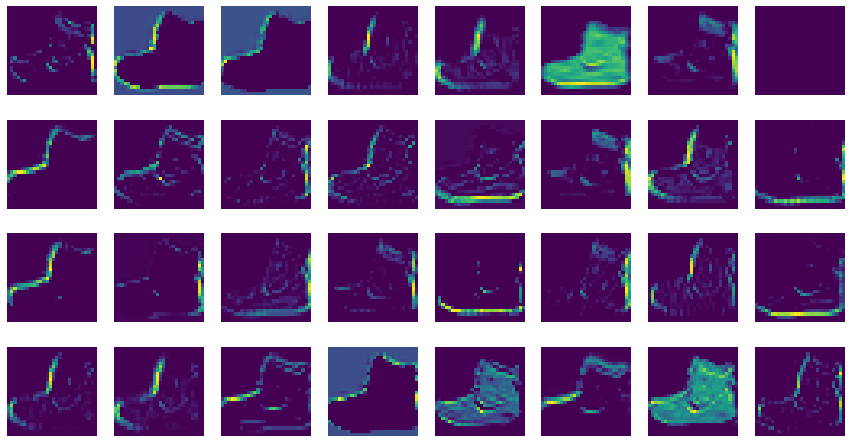

In [24]:
fig, axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(f_map[0,:,:,i*8+j])
        axs[i,j].axis('off')

In [25]:
cov_act2 = keras.Model(m.input, m.layers[2].output)
f2_map = cov_act2.predict(in_data[0:1])
f2_map.shape

(1, 14, 14, 64)

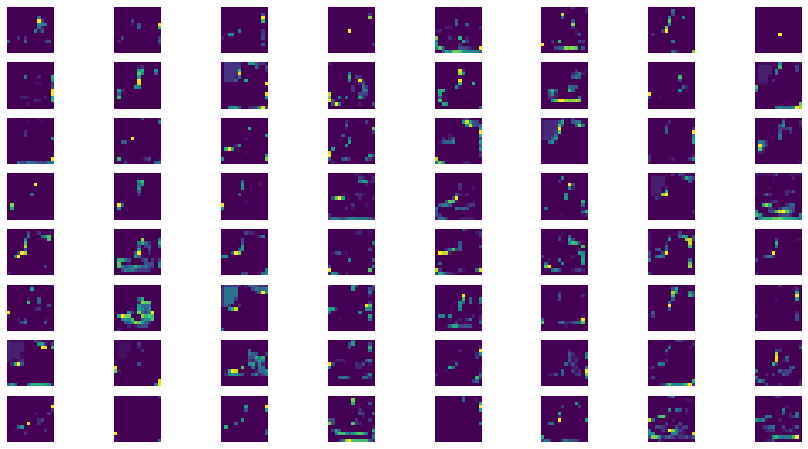

In [26]:
fig, axs = plt.subplots(8,8,figsize=(15,8))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(f2_map[0,:,:,i*8+j])
        axs[i,j].axis('off')